In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv("E:\\NAAMII\\Machine_learning\\dataset\\train_set.csv")

In [13]:
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
  

Shape: (315, 3240)
Memory usage: 7.79 MB


In [6]:
df.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
0,ID_1,18281.541667,18432.0,9409.650391,0.514708,0.011300,0.045369,2.803803,0.356658,1.803803,...,382.968383,2214.0,1.0,136.625113,0.061710,0.0,28.154838,4.174959,0.061710,0
1,ID_2,20010.083333,20100.0,8303.049072,0.417707,0.014959,0.080294,2.338398,0.429532,1.338398,...,452.986164,2548.5,1.0,232.564022,0.090548,0.0,27.934229,3.931950,0.090548,1
2,ID_3,27260.125000,27437.0,12189.649414,0.447160,0.011428,0.046402,2.782842,0.359345,1.782842,...,419.781765,3400.0,1.0,233.593529,0.068704,0.0,27.904807,4.085035,0.068704,1
3,ID_4,41938.125000,42138.0,17866.433594,0.426019,0.009908,0.034878,3.060655,0.326727,2.060655,...,439.023968,5424.0,1.0,427.429572,0.078803,0.0,27.870588,4.011726,0.078803,0
4,ID_5,41274.125000,41439.0,14315.041992,0.346828,0.013596,0.065680,2.478506,0.403469,1.478506,...,485.209184,5096.0,1.0,726.731554,0.142608,0.0,28.846909,3.571352,0.142608,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Columns: 3240 entries, ID to CLASS
dtypes: float64(3238), int64(1), object(1)
memory usage: 7.8+ MB


In [8]:
df.describe()

e:\NAAMII\Machine_learning\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
e:\NAAMII\Machine_learning\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,...,315.000000,315.000000,315.0,315.000000,315.000000,315.0,315.000000,315.000000,315.000000,315.000000
mean,36401.611839,36558.978836,13421.797935,0.399783,0.013326,0.066770,2.572654,0.395949,1.572654,355.140036,...,458.273347,4580.805291,1.0,620.374167,0.112015,0.0,28.510670,3.792381,0.112015,0.393651
std,23979.228698,24006.711019,5229.346354,0.064272,0.002885,0.034442,0.305500,0.054492,0.305500,5460.014132,...,39.628050,2980.121623,0.0,1254.417871,0.043563,0.0,1.711272,0.257607,0.043563,0.489336
min,4601.166667,4646.000000,2420.351481,0.137726,0.008904,0.028169,1.684709,0.304269,0.684709,1.262551,...,309.374029,591.333333,1.0,45.791124,0.058477,0.0,16.430985,1.995746,0.058477,0.000000
25%,23287.562500,23443.500000,10245.704590,0.357646,0.011459,0.046652,2.403035,0.359990,1.403035,14.214779,...,432.298489,2881.000000,1.0,245.299821,0.083622,0.0,27.691774,3.655440,0.083622,0.000000
50%,34818.166667,35028.000000,13894.792969,0.394076,0.012477,0.055314,2.624547,0.381018,1.624547,24.110200,...,460.598280,4377.000000,1.0,424.561776,0.103960,0.0,28.424340,3.815115,0.103960,0.000000
75%,45575.708333,45750.000000,16633.839844,0.434799,0.014242,0.072065,2.777867,0.416141,1.777867,43.724701,...,484.566083,5769.000000,1.0,702.791528,0.131579,0.0,29.450389,3.963320,0.131579,1.000000
max,332120.750000,332379.000000,45741.601562,0.643473,0.025418,0.266032,3.286567,0.603905,2.286567,96940.788837,...,636.069588,40797.000000,1.0,20921.640194,0.512823,0.0,35.149153,4.271132,0.512823,1.000000


In [9]:
df.nunique()

ID              315
Feature_1       314
Feature_2       311
Feature_3       314
Feature_4       314
               ... 
Feature_3235      1
Feature_3236    314
Feature_3237    314
Feature_3238    314
CLASS             2
Length: 3240, dtype: int64

In [14]:
 # Column analysis
print(f"\nColumn Types:")
print(df.dtypes.value_counts())


Column Types:
float64    3238
object        1
int64         1
Name: count, dtype: int64


In [15]:
 # Missing values
missing_count = df.isnull().sum().sum()
missing_pct = (missing_count / (df.shape[0] * df.shape[1])) * 100
print(f"\nMissing Values: {missing_count} ({missing_pct:.2f}%)")


Missing Values: 2668 (0.26%)


In [17]:
if missing_count > 0:
        missing_by_col = df.isnull().sum()
        missing_cols = missing_by_col[missing_by_col > 0]
        print(f"Columns with missing values: {len(missing_cols)}")
        if len(missing_cols) < 24:  # Show details if not too many
            print(missing_cols.head(10))

Columns with missing values: 23
Feature_1712    116
Feature_1713    116
Feature_1714    116
Feature_1715    116
Feature_1716    116
Feature_1717    116
Feature_1718    116
Feature_1719    116
Feature_1720    116
Feature_1721    116
dtype: int64


In [11]:
# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


In [ ]:
def analyze_target_variable(df, target_col='CLASS'):
    """Analyze binary target variable"""
    
    if target_col not in df.columns:
        print(f"Warning: {target_col} column not found!")
        print(f"Available columns: {list(df.columns)}")
        return None
    
    target = df[target_col]
    
    # Class distribution
    class_counts = target.value_counts().sort_index()
    class_props = target.value_counts(normalize=True).sort_index()
    
    print("Class Distribution:")
    for cls in class_counts.index:
        count = class_counts[cls]
        prop = class_props[cls]
        print(f"  Class {cls}: {count} samples ({prop:.1%})")
    
    # Check for class imbalance
    imbalance_ratio = class_counts.max() / class_counts.min()
    print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")
    
    if imbalance_ratio > 1.5:
        print("⚠️  Class imbalance detected - consider stratified sampling")
    else:
        print("✓ Classes are relatively balanced")
    
    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Bar plot
    class_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
    ax1.set_title('Class Distribution (Counts)')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=0)
    
    # Pie plot
    ax2.pie(class_counts.values, labels=[f'Class {i}' for i in class_counts.index], 
            autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    ax2.set_title('Class Distribution (Proportions)')
    
    plt.tight_layout()
    plt.show()
    
    return target


3. TARGET VARIABLE ANALYSIS
Class Distribution:
  Class 0: 191 samples (60.6%)
  Class 1: 124 samples (39.4%)

Imbalance Ratio: 1.54
⚠️  Class imbalance detected - consider stratified sampling


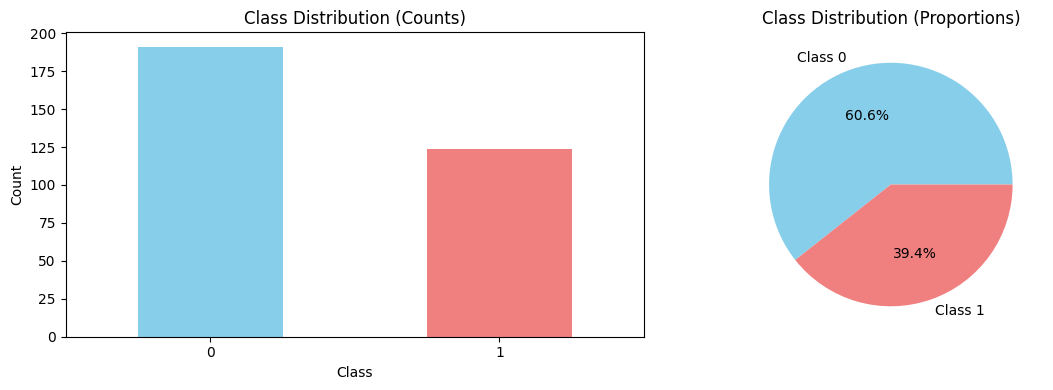

0      0
1      1
2      1
3      0
4      0
      ..
310    0
311    1
312    0
313    1
314    0
Name: CLASS, Length: 315, dtype: int64

In [20]:
analyze_target_variable(df)

In [23]:
def analyze_features_highdim(df, target_col='CLASS', sample_features=50):
    """Analyze features in high-dimensional dataset"""
    
    print(f"\n4. FEATURE ANALYSIS (HIGH-DIMENSIONAL)")
    print("="*45)
    
    # Separate features and target
    if target_col in df.columns:
        features = df.drop([target_col, 'ID'], axis=1, errors='ignore')
        target = df[target_col]
    else:
        features = df.drop(['ID'], axis=1, errors='ignore')
        target = None
    
    print(f"Number of features: {features.shape[1]}")
    print(f"Number of samples: {features.shape[0]}")
    print(f"Ratio (features/samples): {features.shape[1]/features.shape[0]:.1f}")
    
    # Check for infinite and extreme values first
    print(f"\nData Quality Check:")
    inf_count = np.isinf(features.values).sum()
    nan_count = np.isnan(features.values).sum()
    print(f"Infinite values: {inf_count}")
    print(f"NaN values: {nan_count}")
    
    if inf_count > 0:
        print("⚠️  Warning: Infinite values detected!")
        # Find columns with infinite values
        inf_cols = features.columns[np.isinf(features).any()].tolist()
        print(f"Columns with infinite values: {len(inf_cols)}")
        if len(inf_cols) <= 10:
            print(f"Affected columns: {inf_cols}")
    
    # Replace infinite values with NaN for statistics calculation
    features_clean = features.replace([np.inf, -np.inf], np.nan)
    
    # Feature statistics
    print(f"\nFeature Statistics (after handling infinities):")
    feature_stats = features_clean.describe()
    print(f"Mean of means: {feature_stats.loc['mean'].mean():.4f}")
    print(f"Mean of std: {feature_stats.loc['std'].mean():.4f}")
    print(f"Min value across all features: {features_clean.min().min():.4f}")
    print(f"Max value across all features: {features_clean.max().max():.4f}")
    
    # Check for constant/near-constant features
    feature_vars = features_clean.var()
    low_var_features = (feature_vars < 0.01).sum()
    zero_var_features = (feature_vars == 0).sum()
    
    print(f"\nFeature Variance Analysis:")
    print(f"Zero variance features: {zero_var_features}")
    print(f"Low variance features (<0.01): {low_var_features}")
    print(f"Percentage of low-variance features: {low_var_features/len(feature_vars):.1%}")
    
    # Sample a subset of features for detailed analysis
    if features.shape[1] > sample_features:
        print(f"\nAnalyzing sample of {sample_features} features...")
        sample_cols = np.random.choice(features.columns, sample_features, replace=False)
        sample_features_df = features[sample_cols]
    else:
        sample_features_df = features
    
    # Feature distribution plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Distribution of feature means (handle infinities)
    feature_means = features_clean.mean()
    finite_means = feature_means[np.isfinite(feature_means)]
    if len(finite_means) > 0:
        axes[0,0].hist(finite_means, bins=50, alpha=0.7, color='skyblue')
        axes[0,0].set_title(f'Distribution of Feature Means ({len(finite_means)} finite values)')
        axes[0,0].set_xlabel('Mean Value')
        axes[0,0].set_ylabel('Number of Features')
    else:
        axes[0,0].text(0.5, 0.5, 'No finite means available', ha='center', va='center', transform=axes[0,0].transAxes)
        axes[0,0].set_title('Distribution of Feature Means - No Data')
    
    # 2. Distribution of feature variances (handle infinities)
    finite_vars = feature_vars[np.isfinite(feature_vars)]
    if len(finite_vars) > 0:
        axes[0,1].hist(finite_vars, bins=50, alpha=0.7, color='lightgreen')
        axes[0,1].set_title(f'Distribution of Feature Variances ({len(finite_vars)} finite values)')
        axes[0,1].set_xlabel('Variance')
        axes[0,1].set_ylabel('Number of Features')
        if finite_vars.max() > finite_vars.min() and finite_vars.min() > 0:
            axes[0,1].set_yscale('log')
    else:
        axes[0,1].text(0.5, 0.5, 'No finite variances available', ha='center', va='center', transform=axes[0,1].transAxes)
        axes[0,1].set_title('Distribution of Feature Variances - No Data')
    
    # 3. Sample feature distributions (handle infinities)
    sample_features_clean = sample_features_df.replace([np.inf, -np.inf], np.nan)
    if sample_features_clean.shape[1] >= 5:
        # Check if we have enough finite data to plot
        finite_data = sample_features_clean.iloc[:, :5].dropna()
        if len(finite_data) > 0:
            finite_data.plot(kind='hist', alpha=0.6, ax=axes[1,0], bins=20)
            axes[1,0].set_title('Sample Feature Distributions (First 5, finite values only)')
            axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            axes[1,0].text(0.5, 0.5, 'No finite data for histogram', ha='center', va='center', transform=axes[1,0].transAxes)
            axes[1,0].set_title('Sample Feature Distributions - Insufficient Data')
    else:
        axes[1,0].text(0.5, 0.5, 'Insufficient features for sample', ha='center', va='center', transform=axes[1,0].transAxes)
        axes[1,0].set_title('Sample Feature Distributions - Insufficient Features')
    
    # 4. Feature correlation heatmap (sample) - handle infinities
    try:
        if sample_features_df.shape[1] <= 20:
            sample_features_finite = sample_features_clean.dropna(axis=1, how='all')  # Remove columns that are all NaN
            if sample_features_finite.shape[1] >= 2:
                corr_matrix = sample_features_finite.corr()
                # Remove any remaining NaN/inf correlations
                corr_matrix = corr_matrix.fillna(0)
                sns.heatmap(corr_matrix, ax=axes[1,1], cmap='coolwarm', center=0, 
                           square=True, cbar_kws={'shrink': 0.8})
                axes[1,1].set_title(f'Feature Correlation Matrix (Sample, {sample_features_finite.shape[1]} features)')
            else:
                axes[1,1].text(0.5, 0.5, 'Insufficient finite features for correlation', ha='center', va='center', transform=axes[1,1].transAxes)
                axes[1,1].set_title('Feature Correlation Matrix - Insufficient Data')
        else:
            # Show correlation distribution instead
            sample_features_finite = sample_features_clean.dropna()
            if len(sample_features_finite) > 1:
                corr_matrix = sample_features_finite.corr()
                corr_values = corr_matrix.values[np.triu_indices_from(corr_matrix.values, k=1)]
                finite_corr_values = corr_values[np.isfinite(corr_values)]
                if len(finite_corr_values) > 0:
                    axes[1,1].hist(finite_corr_values, bins=30, alpha=0.7, color='orange')
                    axes[1,1].set_title('Distribution of Feature Correlations (Finite values)')
                    axes[1,1].set_xlabel('Correlation Coefficient')
                    axes[1,1].set_ylabel('Frequency')
                else:
                    axes[1,1].text(0.5, 0.5, 'No finite correlations available', ha='center', va='center', transform=axes[1,1].transAxes)
                    axes[1,1].set_title('Distribution of Feature Correlations - No Data')
            else:
                axes[1,1].text(0.5, 0.5, 'Insufficient data for correlations', ha='center', va='center', transform=axes[1,1].transAxes)
                axes[1,1].set_title('Distribution of Feature Correlations - Insufficient Data')
    except Exception as e:
        axes[1,1].text(0.5, 0.5, f'Error in correlation analysis:\n{str(e)[:50]}...', ha='center', va='center', transform=axes[1,1].transAxes)
        axes[1,1].set_title('Feature Correlation Analysis - Error')
    
    plt.tight_layout()
    plt.show()
    
    return features, features_clean, feature_stats


4. FEATURE ANALYSIS (HIGH-DIMENSIONAL)
Number of features: 3238
Number of samples: 315
Ratio (features/samples): 10.3

Data Quality Check:
Infinite values: 4
NaN values: 2668
⚠️  Warning: Infinite values detected!
Columns with infinite values: 2
Affected columns: ['Feature_72', 'Feature_90']

Feature Statistics (after handling infinities):
Mean of means: 136708746.6922
Mean of std: 870879383.1616
Min value across all features: -6520270.7293
Max value across all features: 21302409753075.9023

Feature Variance Analysis:
Zero variance features: 114
Low variance features (<0.01): 918
Percentage of low-variance features: 28.4%

Analyzing sample of 50 features...


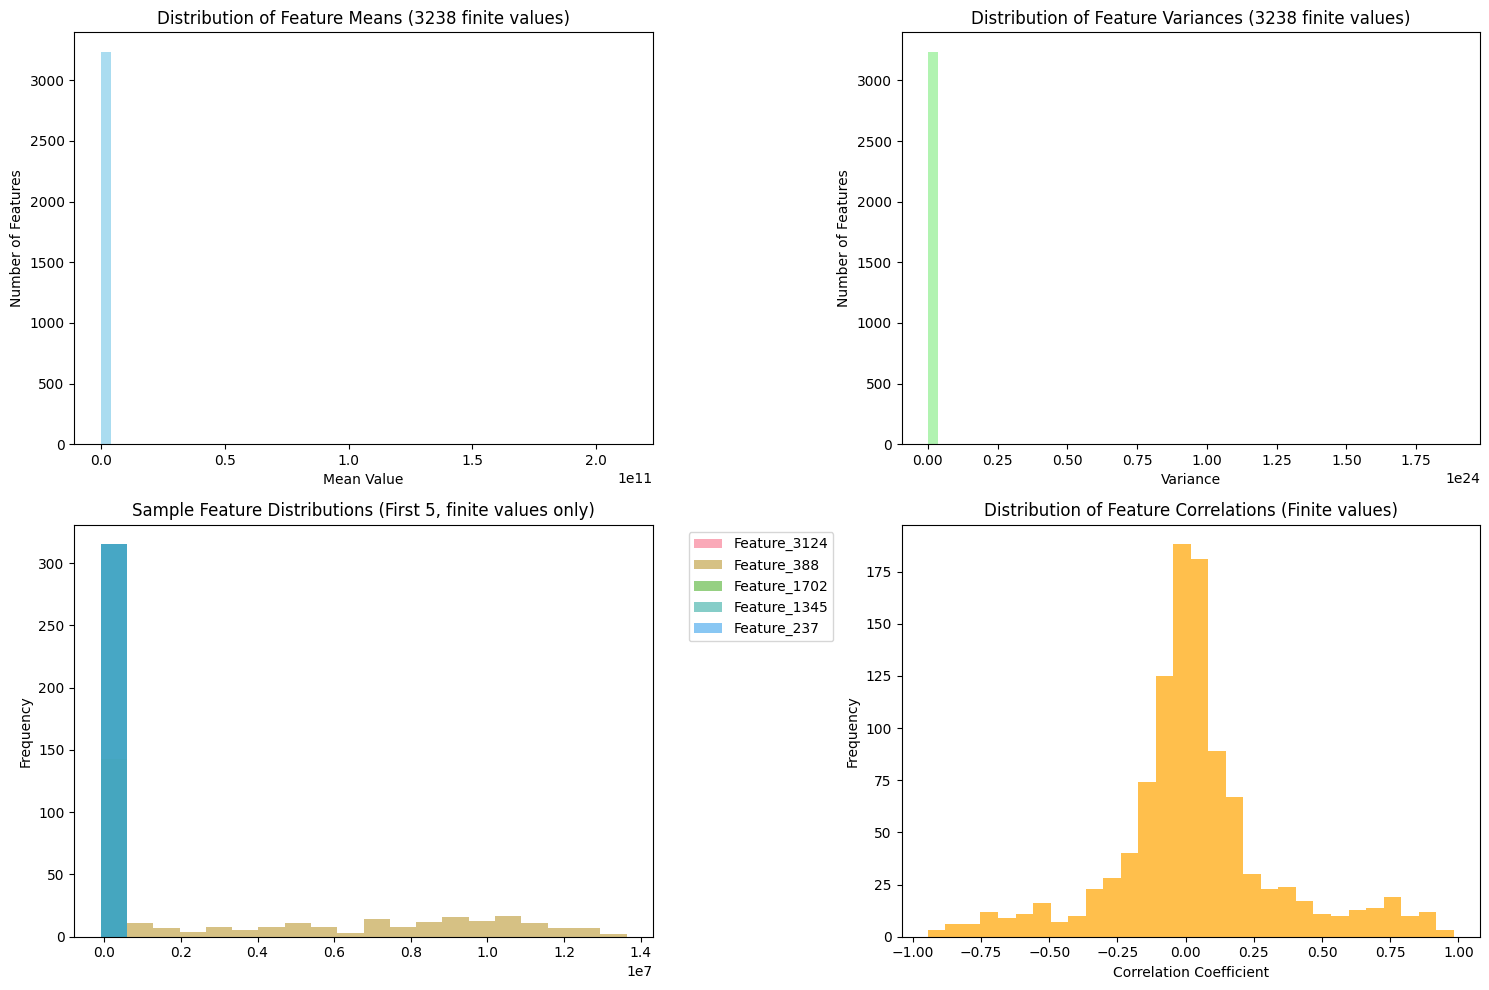

In [24]:
features, features_clean, feature_stats= analyze_features_highdim(df)

In [25]:
def explore_dimensionality_reduction(features, target=None, n_components=50):
    """Explore data structure using PCA - handles infinite values"""
    
    print(f"\n5. DIMENSIONALITY REDUCTION EXPLORATION")
    print("="*45)
    
    # Clean features first - handle infinities and NaN
    features_clean = features.replace([np.inf, -np.inf], np.nan)
    
    # Check if we have enough clean data
    n_clean_samples = features_clean.dropna().shape[0]
    n_clean_features = features_clean.dropna(axis=1).shape[1]
    
    print(f"Data cleaning results:")
    print(f"Clean samples: {n_clean_samples}/{features.shape[0]}")
    print(f"Clean features: {n_clean_features}/{features.shape[1]}")
    
    if n_clean_samples < 10 or n_clean_features < 10:
        print("⚠️  Warning: Insufficient clean data for meaningful PCA analysis")
        print("Recommend data cleaning and preprocessing before PCA")
        return None, None
    
    # Use subset of clean data if necessary
    if n_clean_samples < features.shape[0] * 0.5:  # Less than 50% clean data
        print("⚠️  Warning: Using subset of data with many missing/infinite values")
        features_for_pca = features_clean.dropna()
        if target is not None:
            target_for_pca = target[features_for_pca.index]
        else:
            target_for_pca = None
    else:
        # Fill remaining NaN with median for PCA
        features_for_pca = features_clean.fillna(features_clean.median())
        target_for_pca = target
    
    # Standardize features first
    try:
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features_for_pca)
        
        # Check for any remaining issues
        if np.any(np.isnan(features_scaled)) or np.any(np.isinf(features_scaled)):
            print("⚠️  Warning: Still have NaN/inf after scaling - using robust imputation")
            # Replace any remaining problematic values with 0
            features_scaled = np.nan_to_num(features_scaled, nan=0.0, posinf=0.0, neginf=0.0)
    
    except Exception as e:
        print(f"Error in scaling: {e}")
        return None, None
    
    # PCA Analysis
    pca = PCA()
    pca.fit(features_scaled)
    
    # Explained variance analysis
    cumvar = np.cumsum(pca.explained_variance_ratio_)
    
    print(f"PCA Results:")
    print(f"First component explains: {pca.explained_variance_ratio_[0]:.1%} of variance")
    print(f"First 10 components explain: {cumvar[9]:.1%} of variance")
    print(f"First 50 components explain: {cumvar[49]:.1%} of variance")
    print(f"Components needed for 95% variance: {np.argmax(cumvar >= 0.95) + 1}")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Scree plot
    axes[0,0].plot(range(1, min(51, len(pca.explained_variance_ratio_)+1)), 
                   pca.explained_variance_ratio_[:50], 'bo-')
    axes[0,0].set_title('Scree Plot (First 50 Components)')
    axes[0,0].set_xlabel('Principal Component')
    axes[0,0].set_ylabel('Explained Variance Ratio')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Cumulative explained variance
    axes[0,1].plot(range(1, min(101, len(cumvar)+1)), cumvar[:100], 'ro-')
    axes[0,1].axhline(y=0.95, color='k', linestyle='--', alpha=0.5, label='95%')
    axes[0,1].set_title('Cumulative Explained Variance')
    axes[0,1].set_xlabel('Number of Components')
    axes[0,1].set_ylabel('Cumulative Explained Variance')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. PCA scatter plot (first 2 components)
    pca_2d = PCA(n_components=2)
    features_pca_2d = pca_2d.fit_transform(features_scaled)
    
    if target is not None:
        scatter = axes[1,0].scatter(features_pca_2d[:, 0], features_pca_2d[:, 1], 
                                  c=target, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter, ax=axes[1,0])
        axes[1,0].set_title('PCA: First 2 Components (Colored by Class)')
    else:
        axes[1,0].scatter(features_pca_2d[:, 0], features_pca_2d[:, 1], alpha=0.6)
        axes[1,0].set_title('PCA: First 2 Components')
    
    axes[1,0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
    axes[1,0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
    
    # 4. Feature importance in first PC
    feature_importance = np.abs(pca.components_[0])
    top_features_idx = np.argsort(feature_importance)[-20:]
    
    axes[1,1].barh(range(20), feature_importance[top_features_idx])
    axes[1,1].set_title('Top 20 Features in First Principal Component')
    axes[1,1].set_xlabel('Absolute Loading')
    axes[1,1].set_ylabel('Features')
    
    plt.tight_layout()
    plt.show()
    
    return pca, features_scaled



5. DIMENSIONALITY REDUCTION EXPLORATION
Data cleaning results:
Clean samples: 198/315
Clean features: 3213/3238
PCA Results:
First component explains: 25.5% of variance
First 10 components explain: 75.3% of variance
First 50 components explain: 95.0% of variance
Components needed for 95% variance: 50


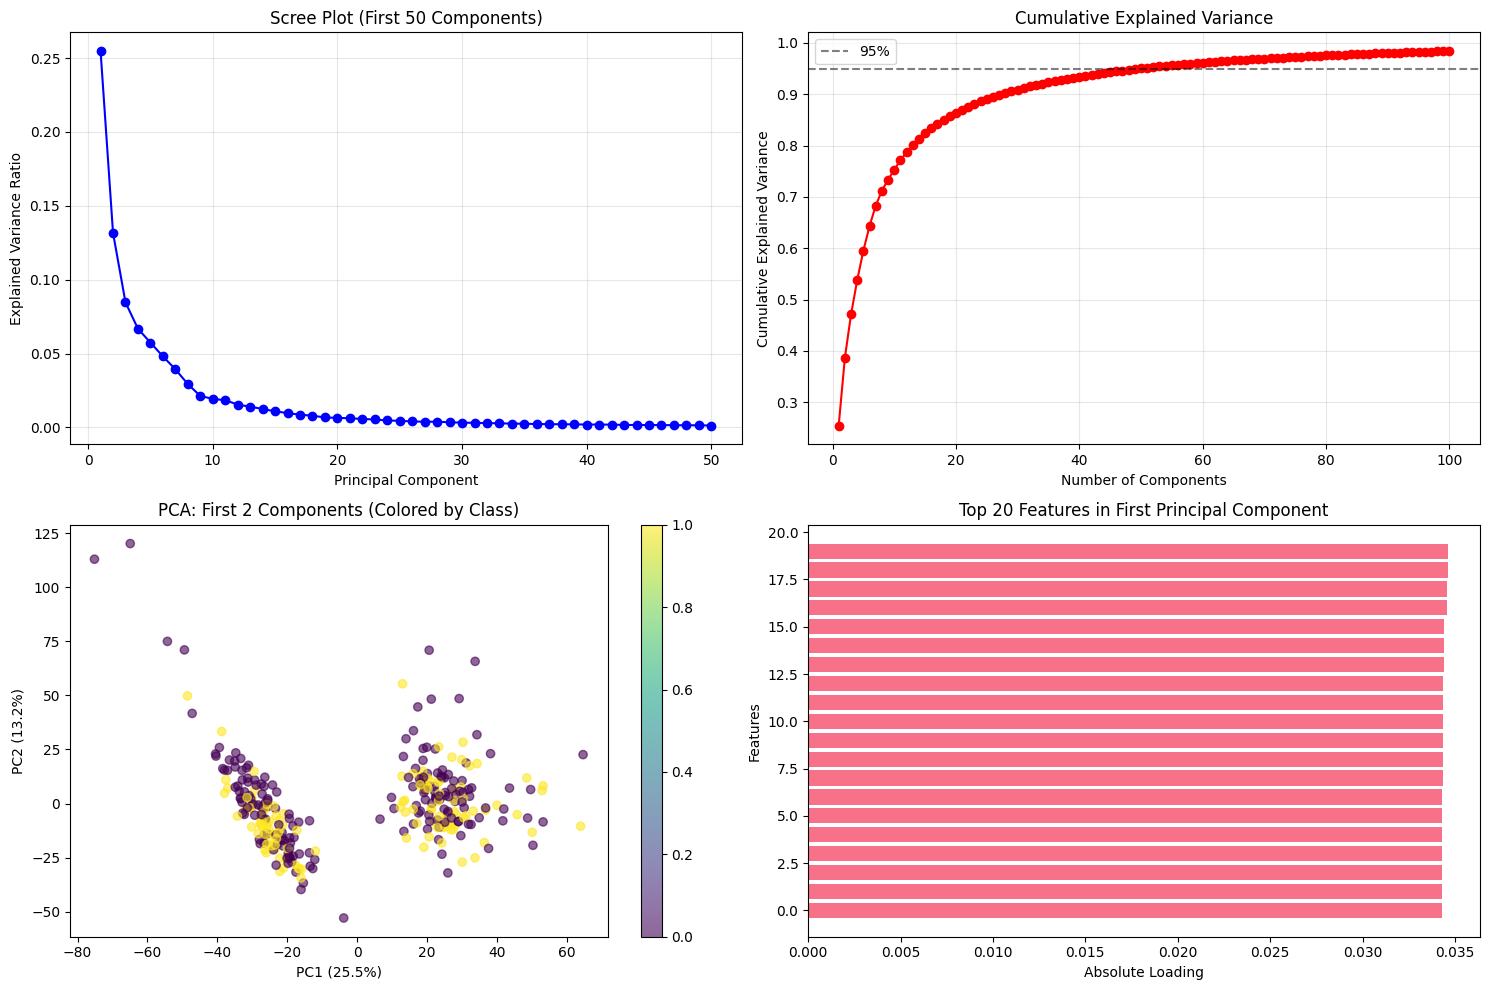

In [26]:
pca, features_scaled = explore_dimensionality_reduction(features, target=df['CLASS'])   

In [27]:
def analyze_correlations(features, threshold=0.95):
    """Analyze feature correlations and multicollinearity"""
    
    print(f"\n6. CORRELATION AND MULTICOLLINEARITY ANALYSIS")
    print("="*50)
    
    # Calculate correlation matrix
    print("Computing correlation matrix... (this may take a moment)")
    corr_matrix = features.corr()
    
    # Find highly correlated feature pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((
                    corr_matrix.columns[i], 
                    corr_matrix.columns[j], 
                    corr_matrix.iloc[i, j]
                ))
    
    print(f"\nHigh Correlation Analysis (threshold > {threshold}):")
    print(f"Number of highly correlated pairs: {len(high_corr_pairs)}")
    
    if len(high_corr_pairs) > 0:
        print("Top 10 highest correlations:")
        sorted_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)
        for i, (feat1, feat2, corr) in enumerate(sorted_pairs[:10]):
            print(f"  {i+1}. {feat1} ↔ {feat2}: {corr:.3f}")
    
    # Overall correlation statistics
    corr_values = corr_matrix.values
    upper_triangle = corr_values[np.triu_indices_from(corr_values, k=1)]
    
    print(f"\nCorrelation Statistics:")
    print(f"Mean absolute correlation: {np.mean(np.abs(upper_triangle)):.3f}")
    print(f"Max correlation: {np.max(np.abs(upper_triangle)):.3f}")
    print(f"Correlations > 0.8: {np.sum(np.abs(upper_triangle) > 0.8)}")
    print(f"Correlations > 0.9: {np.sum(np.abs(upper_triangle) > 0.9)}")
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(upper_triangle, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    plt.title('Distribution of Feature Correlations')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Frequency')
    plt.axvline(x=threshold, color='red', linestyle='--', alpha=0.7, label=f'Threshold ({threshold})')
    plt.axvline(x=-threshold, color='red', linestyle='--', alpha=0.7)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    abs_corr = np.abs(upper_triangle)
    plt.hist(abs_corr, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Absolute Correlations')
    plt.xlabel('Absolute Correlation Coefficient')
    plt.ylabel('Frequency')
    plt.axvline(x=threshold, color='red', linestyle='--', alpha=0.7, label=f'Threshold ({threshold})')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return high_corr_pairs, corr_matrix



6. CORRELATION AND MULTICOLLINEARITY ANALYSIS
Computing correlation matrix... (this may take a moment)

High Correlation Analysis (threshold > 0.95):
Number of highly correlated pairs: 26499
Top 10 highest correlations:
  1. Feature_2511 ↔ Feature_2513: -1.002
  2. Feature_2503 ↔ Feature_2513: -1.002
  3. Feature_2507 ↔ Feature_2513: -1.002
  4. Feature_2508 ↔ Feature_2513: -1.002
  5. Feature_1889 ↔ Feature_1901: -1.000
  6. Feature_1896 ↔ Feature_1901: -1.000
  7. Feature_1897 ↔ Feature_1901: -1.000
  8. Feature_2099 ↔ Feature_2102: -1.000
  9. Feature_2361 ↔ Feature_2362: -1.000
  10. Feature_492 ↔ Feature_498: 1.000

Correlation Statistics:
Mean absolute correlation: nan
Max correlation: nan
Correlations > 0.8: 187035
Correlations > 0.9: 65280


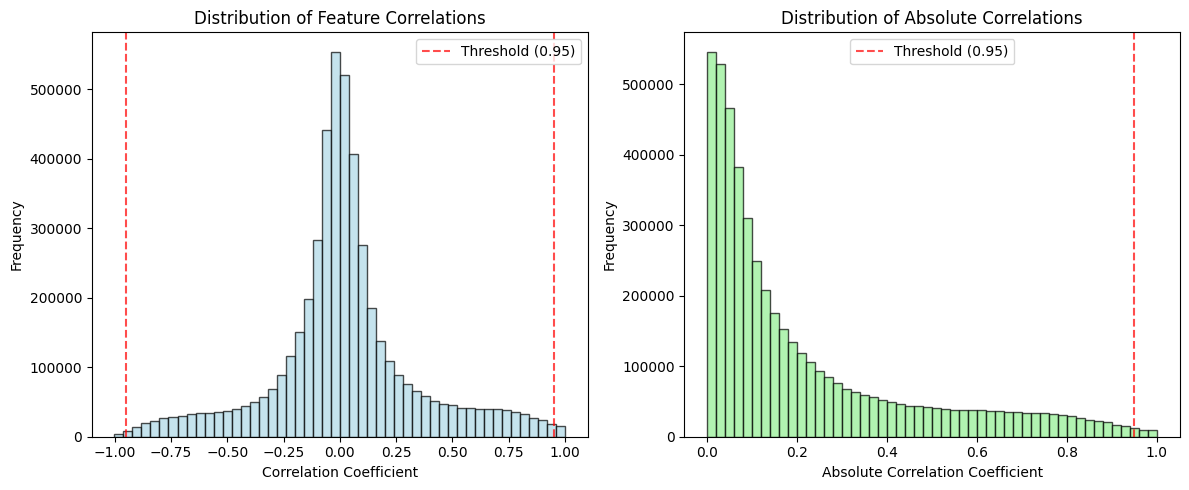

In [28]:
high_corr_pairs, corr_matrix = analyze_correlations(features_clean)